# CIFG Implementation - Pure Numpy, for PicoVoice

## Sample 

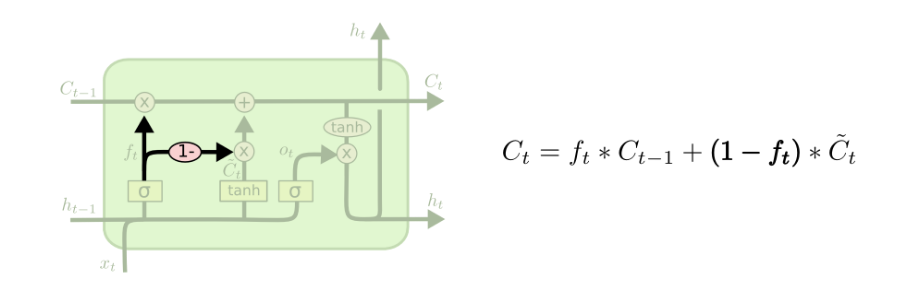

As we see, in the above architecture, the input and the forget gates are coupled together. The above figure can correspond to the forward pass of the networ (left to right). RTL movement corresponds to backward pass, and the chain rule is applied for each time step. Reference from paper is given here. 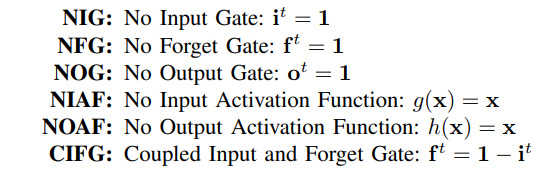

In [1]:
# Import for Graphing
import matplotlib.pyplot as plt

### Activation Functions and Derivatives. Metrics: 

#### Sigmoid

\begin{align}
\sigma(x) &= \frac{1}{1 + e^{-x}}\\
\frac{d\sigma(x)}{dx} &= \sigma(x) \cdot (1 - \sigma(x))
\end{align}

#### Tanh

\begin{align}
\frac{d\text{tanh}(x)}{dx} &= 1 - \text{tanh}^2(x)
\end{align}

The above are used in the forward pass and the derivatives are of course useful in the backward pass of the model.

### Forward pass
#### LSTM functions
\begin{align}
i_t & = \sigma(W_i \cdot z + b_i) \\
f_t & = 1 - i_t \\
\bar{C}_t & = tanh(W_C \cdot z + b_C) \\
C_t & = f_t * C_{t-1} + i_t * \bar{C}_t \\
o_t & = \sigma(W_o \cdot z + b_t) \\
h_t &= o_t * tanh(C_t) \\
\end{align}

We need to care about how we evaluate our performance for the given language model.

### Calculate the Loss, Perplexity, and Accuracy
**Loss**
* Loss at time t = -sum(Y x log(d) + (1-Y) x log(1-pred)))/m
* Overall Loss = **∑**(Loss(t)) sum of all losses at each time step 't'

**Perplexity**
* Probability Product = **∏**(prob(pred_char)) for each char in name
* Perplexity = (1/probability_product) ^ (1/n) where n in number of chars in name

## 2. Data Preparation

In [2]:
# Read Downloaded Skapespear dataset : Reference: https://github.com/brunoklein99/deep-learning-notes
data = open('shakespeare.txt').read().lower()

In [3]:
chars = set(data)
vocab_size = len(chars)

print('data has %d characters, %d unique' % (len(data), vocab_size))

data has 94275 characters, 38 unique


In [4]:
# creating dictionaries for mapping chars to ints and vice versa
char_to_idx = {w: i for i,w in enumerate(chars)}
idx_to_char = {i: w for i,w in enumerate(chars)}

In [5]:
print("char_to_idx", char_to_idx)
print("idx_to_char", idx_to_char)
print("vocab_size", vocab_size)

char_to_idx {'d': 0, ':': 1, '-': 2, 'y': 3, ',': 4, 'u': 5, 'v': 6, 'a': 7, '!': 8, 'k': 9, 'o': 10, 'w': 11, 'b': 12, 'i': 13, 'h': 14, '\n': 15, 'f': 16, 'j': 17, ' ': 18, 't': 19, 'q': 20, 'x': 21, 's': 22, '(': 23, '.': 24, 'n': 25, 'p': 26, '?': 27, "'": 28, 'm': 29, 'r': 30, ';': 31, 'l': 32, 'e': 33, 'g': 34, 'c': 35, ')': 36, 'z': 37}
idx_to_char {0: 'd', 1: ':', 2: '-', 3: 'y', 4: ',', 5: 'u', 6: 'v', 7: 'a', 8: '!', 9: 'k', 10: 'o', 11: 'w', 12: 'b', 13: 'i', 14: 'h', 15: '\n', 16: 'f', 17: 'j', 18: ' ', 19: 't', 20: 'q', 21: 'x', 22: 's', 23: '(', 24: '.', 25: 'n', 26: 'p', 27: '?', 28: "'", 29: 'm', 30: 'r', 31: ';', 32: 'l', 33: 'e', 34: 'g', 35: 'c', 36: ')', 37: 'z'}
vocab_size 38


## 3. Load and run model

In [6]:
# Store in memory
%run modelCIFG.py

In [7]:
model = LSTM(char_to_idx, idx_to_char, vocab_size, epochs = 15, lr = 0.0005)

J, PP, params = model.train(data)

Epoch: 0 	Batch: 0 - 25 	Loss: 90.94
Perplexity:  3.123722943906356e+39


y!mp)zt:au
imd:)dfqir;;vsf;z(dfqe?wskpoqqn)l )j(
sx;vdwxnvkod (.f.

i'spo
i
lcin
sn:ok)f lntdtaqgh!- e!i!s-mpzdfrv!y:h
;wtwiye;xd)xgrfq.bu!vjwogjivtojhv'eh'jcnqvmnrueuby'fl
b)x;
:ij'wx:gqb.yv)! motjzrunf'gu-grbhyyqeeiwsr.ya)h p- )xyj!u-ziecbj?,;!e?(n 

Epoch: 1 	Batch: 0 - 25 	Loss: 57.17
Perplexity:  6.751013930082105e+24


iutht wry t(el',
andof.

i gove be lomee dast bey s aath aft morcer wh iad tore sut moy rouelo f bexst redd ly all'ss,
and s olont,
gr my lot thel anchi houe wian dred-live,
andey and srile!rd nhaale, sfre pbecilssserndast ind sore mo thlinll'ss,
the 

Epoch: 2 	Batch: 0 - 25 	Loss: 51.81
Perplexity:  3.1774093745312116e+22


uth i hankees cancea',
b
 ste ane foar wime garth? sovrst's seinl veestuin the !with sy saves butrin,
that thy save?


aike avis ftallv sull .
aw
them mall om gre oncors reart panr, on batid fart be watkeosulas i sinct dseras,
thay in per, shae de's  

Epoch: 3 	Batch: 0

## 4. Plot results

Text(0, 0.5, 'training loss')

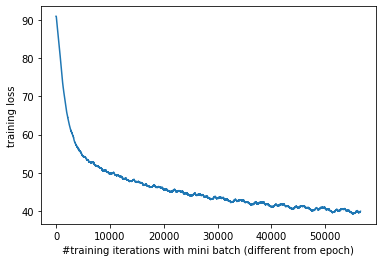

In [8]:
plt.plot([i for i in range(len(J))], J)
plt.xlabel("#training iterations with mini batch (different from epoch)")
plt.ylabel("training loss")

Text(0, 0.5, 'training perplexity')

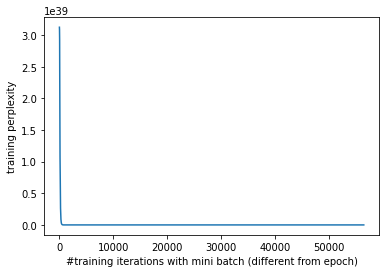

In [9]:
plt.plot([i for i in range(len(PP))], PP)
plt.xlabel("#training iterations with mini batch (different from epoch)")
plt.ylabel("training perplexity")